## Termodinâmica II - Laboratório I 
### Balanço Energético da Central à Diesel

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.sankey import Sankey
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

### Balanço Energético

Consumo de combustível

In [4]:
vol_comb = 25*10**-6 # m3
rho_comb = 0.8325*1000 #kg/m3
delta_t = 8.5 #s

d_m_comb = vol_comb*rho_comb/delta_t
print('Consumo de Combustível [kg/s]: ', d_m_comb)

Consumo de Combustível [kg/s]:  0.0024485294117647057


Massa específica do ar

In [5]:
gamma_hg = 132381 #N/m3
g = 9.785 #m/s^2
delta_h_hg = 699/1000 #m
Pb = gamma_hg*delta_h_hg #N/m^2
R = 287 #J/kgK
T_ar = 23+273 #K
delta_h = 1980.88876 #N/m^2

rho_ar = (Pb-delta_h)/(R*T_ar)
print('Massa específica do ar [kg/m^3]: ', rho_ar)

Massa específica do ar [kg/m^3]:  1.0659364139749503


Massa de ar admitida

In [6]:
d = 0.045 # m
c = 0.59 # -
rho_agua = 996 # kg/m^3
delta_h_agua = 0.202 # m

d_m_ar = np.pi*d**2/4*c*np.sqrt(2*g*rho_agua*rho_ar*delta_h_agua)

print('Massa de ar admitida [kg/s]: ', d_m_ar)

Massa de ar admitida [kg/s]:  0.06079016702339934


### Eficiência Elétrica
Calculada em função da corrente medida e da eficiência do gerador por meio da equação polinomial do gráfico abaixo.
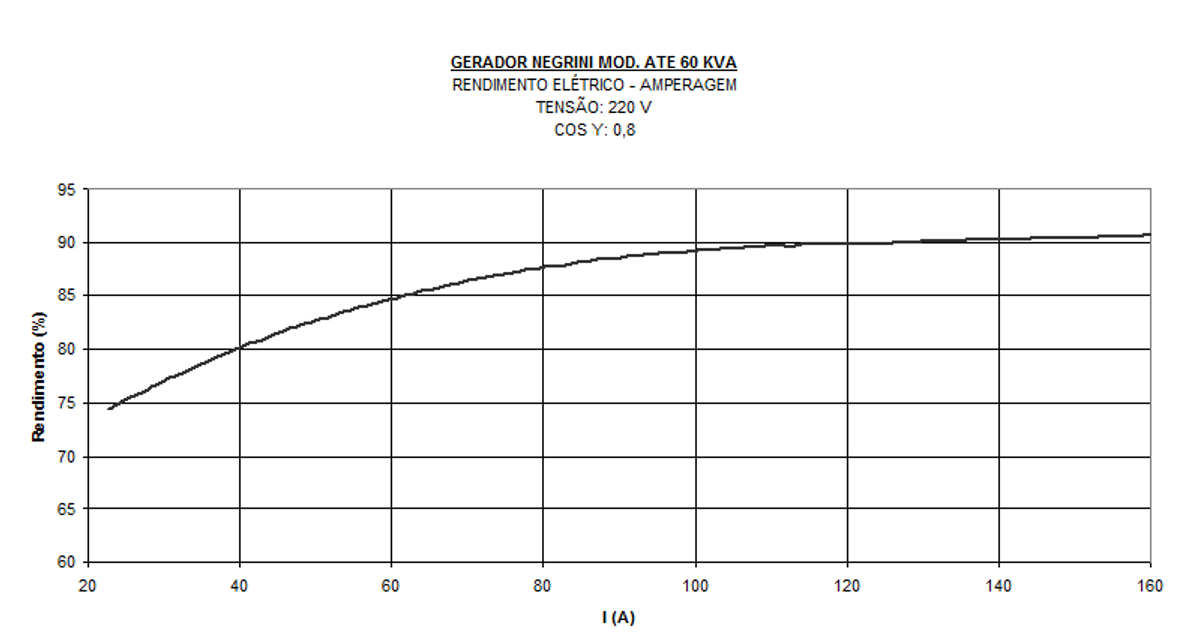

Potência de eixo

In [7]:
P_el = 33 #Potência elétrica do gerador [kW]
eta_ger = 0.885 # -

P_eixo = P_el/eta_ger
print('Potência de eixo [kW]: ',P_eixo)

Potência de eixo [kW]:  37.28813559322034


Potência disponível pelo combustível

In [8]:
PCI = 43000 # Poder calorífico inferior [kJ/kg]

P_comb = d_m_comb*PCI
print('Potência disponível pelo combustível [kW]:', P_comb)

Potência disponível pelo combustível [kW]: 105.28676470588235


Potência perdida no gerador

In [9]:
P_pger =  P_eixo - P_el 
print('Potência perdida no gerador [kW]: ',P_pger)

Potência perdida no gerador [kW]:  4.288135593220339


Potência perdida no motor

In [10]:
P_pmot = P_comb - P_eixo
print('Potência perdida no motor [kW]: ', P_pmot)

Potência perdida no motor [kW]:  67.998629112662


Potência perdida no sistema de refrigeração

In [11]:
dV_agua = 34/60/1000 #m^3/s
C_agua = 4.179 #kJ/kgK
T_in_agua = 58+273 #K
T_out_agua = 67+273 #K

P_prefri = dV_agua*rho_agua*C_agua*(T_out_agua - T_in_agua) 
print('Potência perdida no sistema de refrigeração [kW]: ',P_prefri)

Potência perdida no sistema de refrigeração [kW]:  21.227648399999996


Potência perdida no sistema de escape do motor

In [12]:
T_out_gesc = 258+273 #K
T_in_gesc = 23+273 #K
T_gesc = (T_out_gesc + T_in_gesc)/2 # K
# Tabela de calor específico dos gases de escape pela temperatura
T_tab = [400,500,600,700,880] #K
C_tab = [1.05,1.07,1.09,1.12,1.14] #kJ/kgK
C_gesc = np.interp(T_gesc,T_tab,C_tab)

P_pesc = (d_m_ar + d_m_comb)*C_gesc*(T_out_gesc - T_in_gesc)
print('Potência perdida no sistema de escape do motor [kW]: ', P_pesc)

Potência perdida no sistema de escape do motor [kW]:  15.644273298264839


Potência perdida no atrito do motor 

In [13]:
eta_el_atr = 0.84 # -
P_el_atr = 23 #kW

P_atr = eta_el_atr *P_el_atr
print('Potência perdida no atrito do motor [kW]: ', P_atr)

Potência perdida no atrito do motor [kW]:  19.32


Potência perdida no motor por motivos diversos

In [14]:
P_prest = P_pmot - P_prefri - P_pesc - P_atr
print('Potência restante por motivos diversos [kW]: ', P_prest)

Potência restante por motivos diversos [kW]:  11.80670741439717


#### Sumário de perda de potência

In [15]:
res_eixo = P_eixo/P_comb
res_el = P_el/P_comb
eta_ger = P_pger/P_comb
eta_refri = P_prefri/P_comb
eta_esc = P_pesc/P_comb
eta_atr = P_atr/P_comb
eta_rest = P_prest/P_comb

print('Potência Combustível: ', P_comb)
print('Potência no eixo: ', P_eixo)
print('Gerador: ', P_pger)
print('Refrigeração: ', P_prefri)
print('Escape: ', P_pesc)
print('Atrito: ', P_atr)
print('Perdas diversas no motor: ', P_prest)

Potência Combustível:  105.28676470588235
Potência no eixo:  37.28813559322034
Gerador:  4.288135593220339
Refrigeração:  21.227648399999996
Escape:  15.644273298264839
Atrito:  19.32
Perdas diversas no motor:  11.80670741439717


### Diagrama de Sankey 

<IPython.core.display.Javascript object>


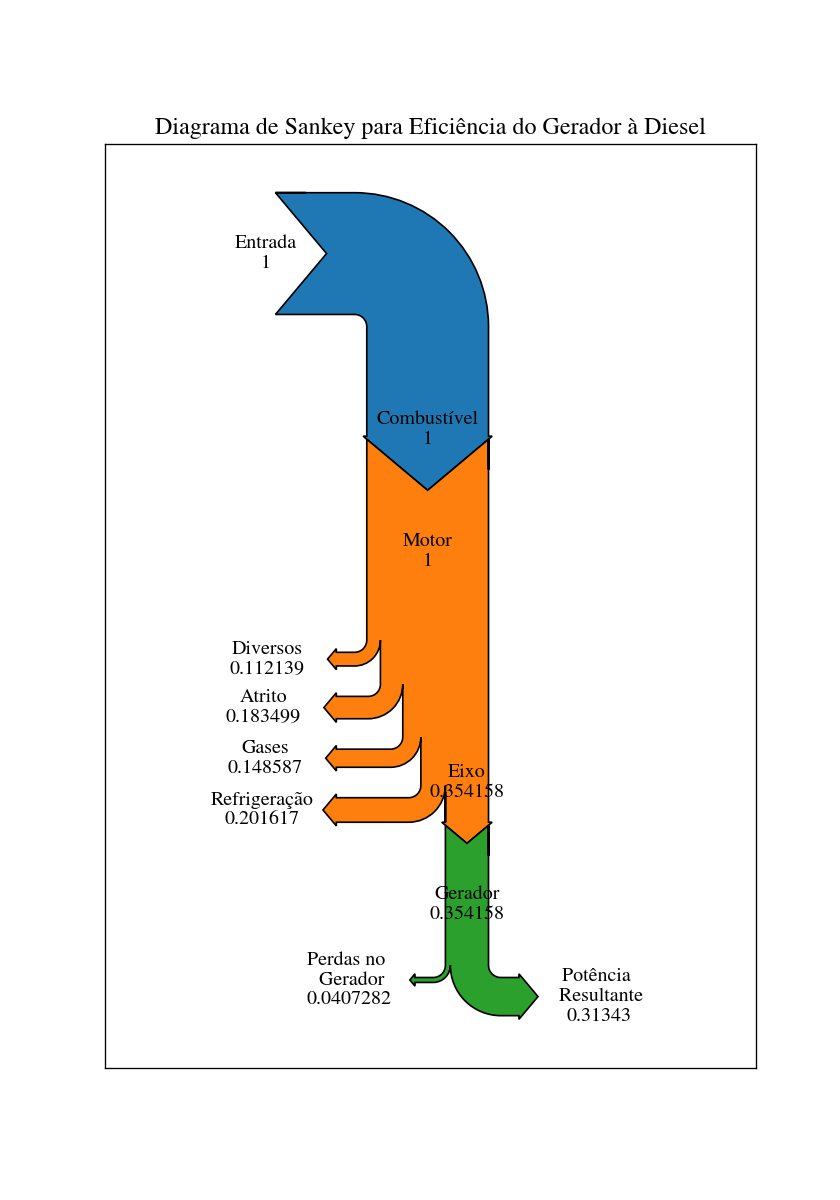

[namespace(angles=[0, 3], flows=array([ 1, -1]), patch=<matplotlib.patches.PathPatch object at 0x0000013A0E010948>, text=Text(0, 0, ''), texts=[Text(-0.33045018441136004, 0.0, 'Entrada\n1'), Text(1.0, -2.444722804523958, 'Motor\n1')], tips=array([[ 0.16954982,  0.        ],
        [ 1.        , -1.9447228 ]])),
 namespace(angles=[3, 3, 6, 6, 6, 6], flows=array([ 1.        , -0.35415786, -0.20161744, -0.14858727, -0.18349885,
        -0.11213857]), patch=<matplotlib.patches.PathPatch object at 0x0000013A0E01BF08>, text=Text(0.9999999999999999, -2.2751729889353185, ''), texts=[Text(1.0, -1.4447228045239584, 'Combustível\n1'), Text(1.3229210684866965, -5.344774980966111, 'Gerador\n0.354158'), Text(-0.3597615504366575, -4.570206403847116, 'Refrigeração\n0.201617'), Text(-0.3375127521110658, -4.145104045059351, 'Gases\n0.148587'), Text(-0.352159896642244, -3.7290609844907356, 'Atrito\n0.183499'), Text(-0.3222207060178687, -3.331242274791803, 'Diversos\n0.112139')], tips=array([[ 1.        

In [16]:
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Diagrama de Sankey para Eficiência do Gerador à Diesel")
sankey = Sankey(ax=ax, scale=1, offset=0.5)
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1],
           orientations=[0, -1],
       labels=['Entrada', 'Motor'],
          pathlengths=[0, 1])
sankey.add(flows=[1, -res_eixo, -eta_refri, -eta_esc, -eta_atr, -eta_rest],
           orientations=[0, 0, -1, -1, -1, -1],
           labels=['Combustível', 'Gerador', 'Refrigeração', 'Gases', 'Atrito', 'Diversos'],
           trunklength=2.0,
          prior=0,
          connect=(1, 0))
sankey.add(flows=[res_eixo, -eta_ger, -res_el],
           orientations=[0, -1, 1],
          labels=['Eixo','Perdas no \n Gerador' ,'Potência \n Resultante'],
          prior=1,
           trunklength=1.5,
          connect=(1, 0))
sankey.finish()